## Application 2 : Faire varier la composition du jeu de données d'entraînement



**Let's go!**

In [1]:
import toolbox as toolbox

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os


import io
import itertools
from packaging import version


from tensorflow import keras
from tensorflow.keras import models

from PIL.Image import *
import urllib.request

import numpy as np
import sklearn.metrics

print('Hi')
print(tf.__version__)

Hi
2.4.0
Hi
2.4.0


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Number of training batches: 2
Number of validation batches: 1
Number of test batches: 1


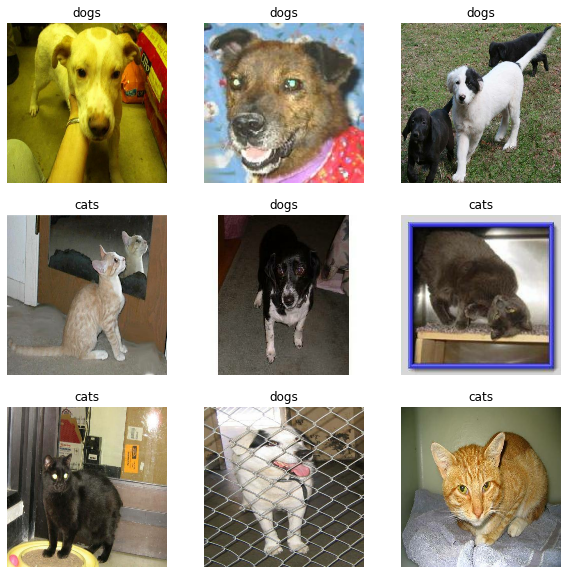

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

path_to_zip = tf.keras.utils.get_file(
        'cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')

validation_dir = os.path.join(PATH, 'validation')

train_dataset = image_dataset_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                      shuffle=True,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE)

class_names = train_dataset.class_names
toolbox.show_images(train_dataset, class_names)


value=30
train_batches = tf.data.experimental.cardinality(train_dataset)
train_dataset = train_dataset.take(train_batches // value)

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // value)
validation_dataset = validation_dataset.take(val_batches // value)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))



In [3]:
model = toolbox.create_model(train_dataset, IMG_SIZE)

(32, 5, 5, 1280)
(32, 1280)
(32, 1)
Number of layers in the base model:  154
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
__________________________________________________

In [4]:
initial_epochs = 15

loss0, accuracy0 = toolbox.evaluate_model(validation_dataset, model)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


1/1 [==============================] - 2s 2s/step - loss: 1.3995 - accuracy: 0.6250
initial loss: 1.40
initial accuracy: 0.62


In [5]:
history= model.fit(train_dataset,  
          epochs=initial_epochs,
          validation_data=validation_dataset)  

Epoch 1/15
2/2 [==============================] - 6s 2s/step - loss: 1.9633 - accuracy: 0.5156 - val_loss: 0.5999 - val_accuracy: 0.8125
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 0.7269 - accuracy: 0.7344 - val_loss: 0.4629 - val_accuracy: 0.8438
Epoch 3/15
2/2 [==============================] - 2s 1s/step - loss: 0.6444 - accuracy: 0.7500 - val_loss: 0.2016 - val_accuracy: 0.9062
Epoch 4/15
2/2 [==============================] - 2s 1s/step - loss: 0.4346 - accuracy: 0.8750 - val_loss: 0.4963 - val_accuracy: 0.8750
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 0.4479 - accuracy: 0.8906 - val_loss: 0.3514 - val_accuracy: 0.9062
Epoch 6/15
2/2 [==============================] - 2s 1s/step - loss: 0.2729 - accuracy: 0.9219 - val_loss: 0.0538 - val_accuracy: 0.9688
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: 0.4666 - accuracy: 0.8906 - val_loss: 0.1716 - val_accuracy: 0.9062
Epoch 8/15
2/2 [=========================

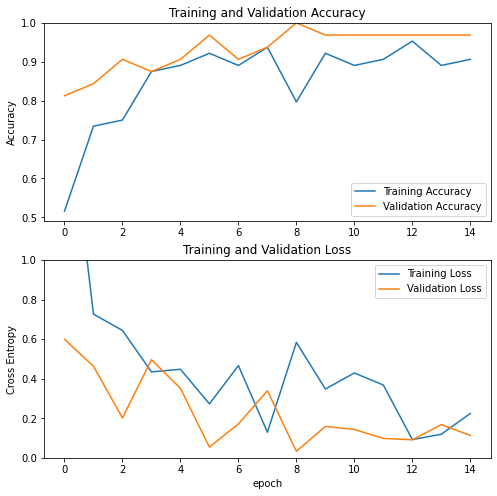

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Predictions:
 [0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1]
Labels:
 [0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1]


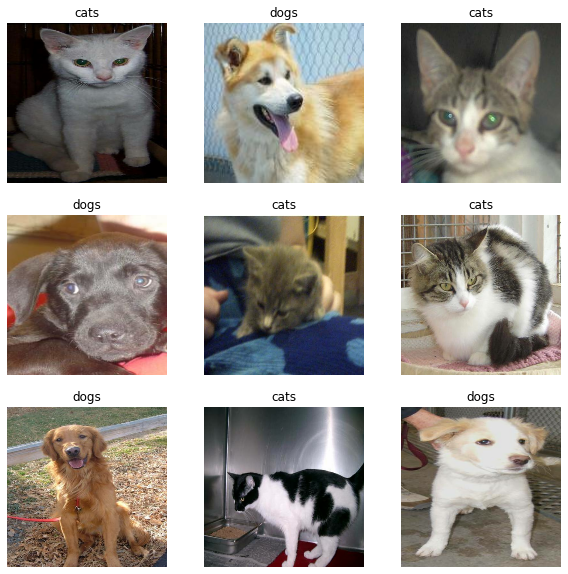

In [7]:
toolbox.test_model(test_dataset, model, class_names)

In [9]:
saved_model=new_model = 'my_model100datas.h5'

trained_model=toolbox.load_model(saved_model)

loss, accuracy = toolbox.evaluate_model(test_dataset, trained_model)

print("initial loss: {:.2f}".format(loss))
print("initial accuracy: {:.2f}".format(accuracy))


1/1 [==============================] - 1s 1s/step - loss: 2.1738 - accuracy: 0.5312
initial loss: 2.17
initial accuracy: 0.53


<img src="index.png" alt="Problème d'apprentissage" title="Courbe d'apprentissage" />